# Bank Customer Churn Prediction

`Author:` [Prashant Sharma](https://github.com/Prashantpq)\
`Date:` 20.December.2024\
`Dataset:` [Bank Customer Churn Prediction](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction)

### About Dataset (Meta data)
#### Context
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer.

### Content
#### Column Descriptions:
* `Customer ID:` A unique identifier for each customer.
* `Surname:` The customer's surname or last name.
* `Credit Score:` A numerical value representing the customer's credit score.
* `Geography:` The country where the customer resides (France, Spain or Germany).
* `Gender:` The customer's gender (Male or Female).
* `Age:`  The customer's age.
* `Tenure:` The number of years the customer has been with the bank.
* `Balance:` The customer's account balance.
* `NumOfProducts:` The number of bank products the customer uses (e.g., savings account, credit card).
* `MonthsHasCrCard:` Whether the customer has a credit card (1 = yes, 0 = no).
* `IsActiveMember:` Whether the customer is an active member (1 = yes, 0 = no).
* `EstimatedSalary:`  The estimated salary of the customer.
* `Exited:` Whether the customer has churned (1 = yes, 0 = no).

# `Import Libraries`

In [25]:
# Import libraries

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and utilities
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# `Load the Dataset`

In [26]:
df = pd.read_csv('Data/Customer.csv')
# Show top 10 rows
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


# `Data Preprocessing`

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


`There are some categorical columns too in the dataset`
* `Categorical Columns:` Surname, Geography, Gender

In [28]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [29]:
#Checking the data shape
df.shape

(10002, 14)

In [30]:
# Check for missing values in the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

`There are some missing values in the columns: Geography, Age, HasCrCard, IsActiveMember`


As there are only one-one missing values in each columns so we dropping it

In [35]:
df.dropna(inplace=True)

In [36]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,11,15767821,Bearce,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,13,15632264,Kay,476,France,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,14,15691483,Chin,549,France,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0


In [33]:
df.shape

(9998, 14)

In [34]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

`Now there are no missing values in the dataset`

In [37]:
# Check NaN values in the entire dataset
nan_values = df.isna().sum()
print("NaN values in each column:\n", nan_values)

NaN values in each column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


`There are no nan values too`

In [38]:
# Check unique values in categorical columns
print("Surname:", df['Surname'].unique())
print("Geography:", df['Geography'].unique())
print("Gender:", df['Gender'].unique())


Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [39]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,11,15767821,Bearce,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,12,15737173,Andrews,497,Spain,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,13,15632264,Kay,476,France,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,14,15691483,Chin,549,France,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0


In [40]:
df = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

`There was no use of these columns for churn prediction so we have dropped it`

In [44]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,528,France,Male,31.0,6,102016.72,2,0.0,0.0,80181.12,0
11,497,Spain,Male,24.0,3,0.00,2,1.0,0.0,76390.01,0
12,476,France,Female,34.0,10,0.00,2,1.0,0.0,26260.98,0
13,549,France,Female,25.0,5,0.00,2,0.0,0.0,190857.79,0


# `Exploratory Data Analysis (EDA)`

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Geography        9998 non-null   object 
 2   Gender           9998 non-null   object 
 3   Age              9998 non-null   float64
 4   Tenure           9998 non-null   int64  
 5   Balance          9998 non-null   float64
 6   NumOfProducts    9998 non-null   int64  
 7   HasCrCard        9998 non-null   float64
 8   IsActiveMember   9998 non-null   float64
 9   EstimatedSalary  9998 non-null   float64
 10  Exited           9998 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.3+ KB


# `Analysis of Geography Column`

In [46]:
# Find the values of Geography column
df['Geography'].value_counts()

Geography
France     5012
Germany    2510
Spain      2476
Name: count, dtype: int64

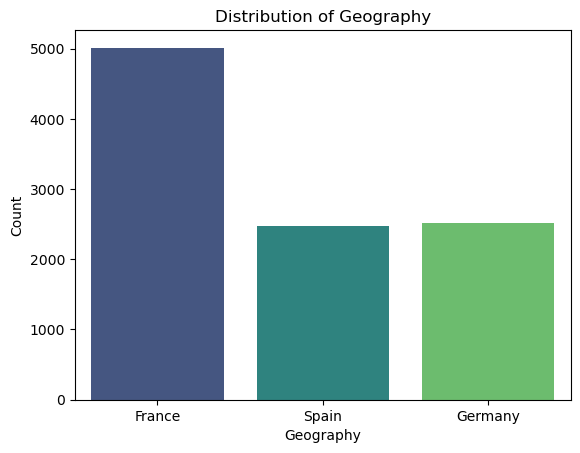

In [65]:
sns.countplot(x='Geography', data=df, palette='viridis')
plt.title('Distribution of Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

`Most of the customers are from France followed by Spain and Germany`

# `Exploring Gender Column`

In [66]:
# Find the values of Geography column
df['Gender'].value_counts()

Gender
Male      5455
Female    4543
Name: count, dtype: int64

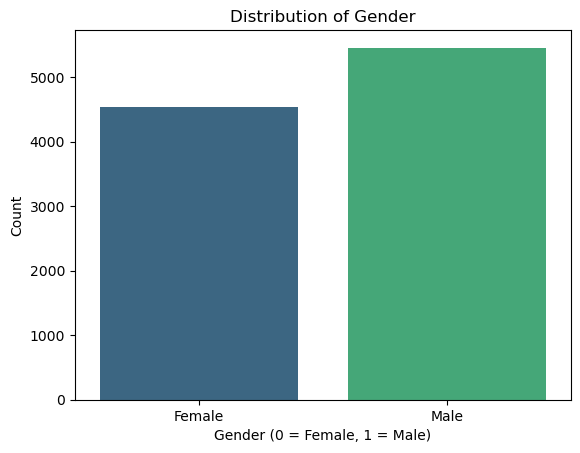

In [67]:
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

`Most of the customers are male`

In [69]:
# calculating the percentage fo male and female value counts in the data

male_count = 5455
female_count = 4543

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage in the data: {male_percentage:.2f}%')
print(f'Female percentage in the data: {female_percentages:.2f}%')

Male percentage in the data: 54.56%
Female percentage in the data: 45.44%


`Males are more than 50% in the dataset`

# `Exploring Age Column`

In [71]:
print('Age Summary Statistics:')
df['Age'].describe()

Age Summary Statistics:


count    9998.000000
mean       38.920287
std        10.487986
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

In [72]:
df['Age'].min(), df['Age'].max()

(18.0, 92.0)

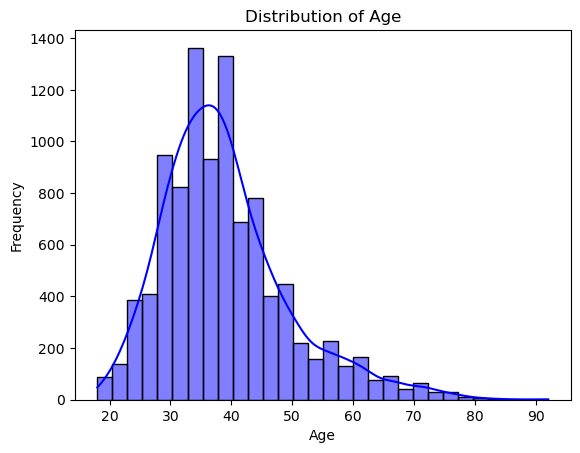

In [74]:
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Mean 38.920287057411485
Median 37.0
Mode 0    37.0
Name: Age, dtype: float64


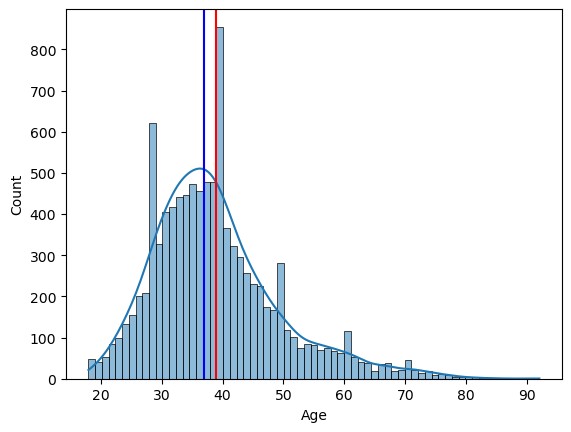

In [75]:
sns.histplot(df['Age'], kde=True)
plt.axvline(df['Age'].mean(), color='Red')
plt.axvline(df['Age'].median(), color= 'orange')
plt.axvline(df['Age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['Age'].mean())
print('Median', df['Age'].median())
print('Mode', df['Age'].mode())

# `Analysis of IsActiveMember Column`

In [76]:
df['IsActiveMember'].value_counts()

IsActiveMember
1.0    5147
0.0    4851
Name: count, dtype: int64

`Most of the users in the dataset are active`

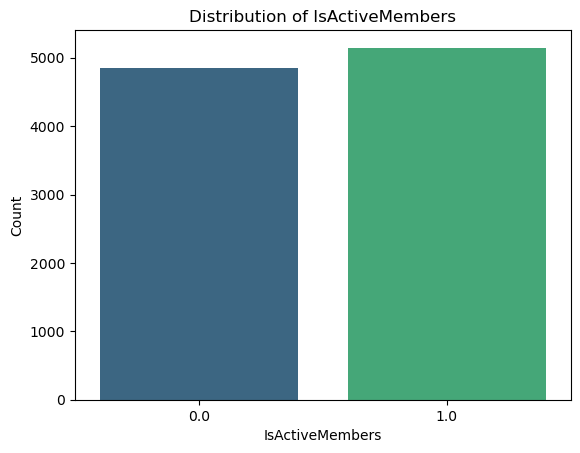

In [77]:
sns.countplot(x='IsActiveMember', data=df, palette='viridis')
plt.title('Distribution of IsActiveMembers')
plt.xlabel('IsActiveMembers')
plt.ylabel('Count')
plt.show()